In [183]:
import pandas as pd
import sweetviz as sv
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance  # ✅ Fixed import
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [184]:
data = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [185]:
data.head(3)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,193.0,NaN,18993.0,F,NaN,NaN,NaN,N,1.0,NaN,3.29,NaN,NaN,NaN,NaN,193.0,10.8,3.0,D
1,1,2221.0,Placebo,16216.0,F,N,Y,N,N,0.6,320.0,3.60,10.0,1282.0,122.45,80.0,358.0,9.7,3.0,C
2,2,625.0,NaN,25202.0,F,NaN,NaN,NaN,N,1.8,NaN,3.42,NaN,NaN,NaN,NaN,171.0,11.6,4.0,D


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8441 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8444 non-null   object 
 6   Hepatomegaly   8432 non-null   object 
 7   Spiders        8436 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6587 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8327 non-null   float64
 13  Alk_Phos       8430 non-null   float64
 14  SGOT           8429 non-null   float64
 15  Tryglicerides  6548 non-null   float64
 16  Platelets      14439 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

In [187]:
data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6587.000000,15000.000000,8327.000000,8430.000000,8429.000000,6548.000000,14439.000000,14974.000000,15000.000000
mean,7499.500000,1965.807600,19294.668467,1.855687,324.848945,3.521127,75.634995,1628.906749,106.280554,111.154192,253.898975,10.626513,3.027067
std,4330.271354,1247.533088,3672.622854,2.738142,174.154842,0.377559,75.543577,1818.348853,51.911111,51.037848,96.874486,0.723748,0.882186
min,0.000000,14.000000,309.000000,0.300000,120.000000,1.960000,0.600000,2.940000,0.900000,33.000000,0.300000,9.000000,1.000000
25%,3749.750000,1095.000000,16467.000000,0.600000,239.000000,3.290000,31.000000,720.000000,71.000000,78.000000,183.000000,10.100000,2.000000
50%,7499.500000,1786.000000,19567.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,249.000000,10.600000,3.000000
75%,11249.250000,2624.000000,22369.000000,1.800000,356.000000,3.770000,88.000000,1644.000000,130.200000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,25976.000000,94754.000000,28.000000,1775.000000,4.640000,598.000000,15112.000000,815.000000,598.000000,3585.000000,18.000000,4.000000


In [188]:
data.isnull().sum()

id                  0
N_Days              0
Drug             6559
Age                 0
Sex                 0
Ascites          6556
Hepatomegaly     6568
Spiders          6564
Edema               0
Bilirubin           0
Cholesterol      8413
Albumin             0
Copper           6673
Alk_Phos         6570
SGOT             6571
Tryglicerides    8452
Platelets         561
Prothrombin        26
Stage               0
Status              0
dtype: int64

In [189]:
# Load your data (replace 'data.csv' with your actual file)


# # Generate the Sweetviz report
# report = sv.analyze(data)

# # Save the report to an HTML file
# report.show_html('sweetviz_report.html')



In [190]:
# Drop id column if it exists
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)  # ✅ Added check before dropping 'id'

# Remove duplicates if any
# data.drop_duplicates(inplace=True)

# Map target variable to 0 and 1
# data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [191]:
# drop all missing values in all columns
data = data.dropna()

In [192]:
# Mean value imputation
# data["Age"].fillna(data["Age"].mean(), inplace=True)

In [193]:
# Build Pipeline

# Split data
X = data.drop('Status', axis=1)
y = data['Status']
y


1         C
5         C
6        CL
7         C
10        C
         ..
14990     C
14992     C
14995     C
14997     C
14999     C
Name: Status, Length: 6264, dtype: object

In [194]:
# Encode y values
le = LabelEncoder()
y = le.fit_transform(y)
X = pd.get_dummies(X)

X.describe()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,2125.025702,18561.106641,2.023771,326.384259,3.588437,79.597797,1680.422045,108.979633,111.579446,265.420546,10.640629,3.022510
std,1190.515690,3566.842695,3.017134,175.636103,0.359756,79.725308,1851.210929,51.111957,51.188371,98.851769,0.770891,0.862198
min,18.000000,1293.000000,0.300000,120.000000,1.960000,0.600000,2.940000,0.900000,33.000000,0.300000,9.000000,1.000000
25%,1293.000000,15730.000000,0.600000,239.000000,3.370000,36.000000,728.000000,71.300000,80.000000,203.000000,10.000000,2.000000
50%,2055.000000,18733.000000,0.900000,280.000000,3.610000,53.000000,1087.000000,97.650000,99.000000,265.000000,10.600000,3.000000
75%,2847.000000,20736.000000,2.100000,358.000000,3.800000,89.000000,1713.000000,134.850000,133.000000,319.000000,11.000000,4.000000
max,20597.000000,33496.000000,28.000000,1775.000000,4.640000,598.000000,15112.000000,815.000000,598.000000,3585.000000,17.100000,4.000000


In [195]:
test.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,10000.00000,10000.000000,10000.000000,10000.000000,4422.000000,10000.000000,5568.000000,5633.000000,5627.000000,4387.000000,9624.000000,9993.000000,10000.000000
mean,19999.50000,1958.908280,19266.717700,1.861890,328.382180,3.524956,74.125180,1647.879805,107.033469,109.992706,253.096207,10.617923,2.998000
std,2886.89568,1242.742424,3686.169915,2.741474,182.488192,0.371168,74.709746,1824.269083,83.696726,48.932852,98.652288,0.737731,0.893239
min,15000.00000,2.800000,2011.000000,0.300000,43.000000,1.960000,1.000000,2.840000,26.350000,33.000000,0.900000,0.700000,1.000000
25%,17499.75000,1092.000000,16417.000000,0.600000,239.000000,3.290000,31.000000,720.000000,70.000000,78.000000,183.000000,10.100000,2.000000
50%,19999.50000,1776.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,248.000000,10.600000,3.000000
75%,22499.25000,2644.000000,22388.000000,1.800000,360.750000,3.770000,84.000000,1689.000000,130.200000,130.000000,311.000000,11.000000,4.000000
max,24999.00000,28320.000000,35119.000000,28.000000,1775.000000,4.640000,588.000000,16802.000000,5084.400000,598.000000,3574.000000,18.000000,4.000000


In [196]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [197]:
# Mean value imputation
# data["Age"].fillna(data["Age"].mean(), inplace=True)

In [198]:
# print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5011, 27)
Shape of X_test:  (1253, 27)
Shape of y_train:  (5011,)
Shape of y_test:  (1253,)


In [199]:
# Encode y values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize XGBoost classifier with corrected parameters
model = XGBClassifier(
    objective='multi:softprob',  # ✅ Fixed parameter location
    num_class=3,  # ✅ Added this to match softprob
    eval_metric=["merror", "mlogloss"],  # ✅ Correctly set evaluation metrics
    n_estimators=1000,
    # early_stopping_rounds=10 
)

# Train model and evaluate on test set
model.fit(X_train, y_train_encoded, eval_set=[(X_train, y_train_encoded), (X_test, y_test_encoded)], verbose=True)  # ✅ Fixed eval_set names


[0]	validation_0-merror:0.11076	validation_0-mlogloss:0.81406	validation_1-merror:0.14765	validation_1-mlogloss:0.83393
[1]	validation_0-merror:0.10716	validation_0-mlogloss:0.64827	validation_1-merror:0.14445	validation_1-mlogloss:0.68446
[2]	validation_0-merror:0.10437	validation_0-mlogloss:0.53950	validation_1-merror:0.14685	validation_1-mlogloss:0.59234
[3]	validation_0-merror:0.09818	validation_0-mlogloss:0.46256	validation_1-merror:0.14046	validation_1-mlogloss:0.52887
[4]	validation_0-merror:0.09439	validation_0-mlogloss:0.40741	validation_1-merror:0.14126	validation_1-mlogloss:0.48666
[5]	validation_0-merror:0.09060	validation_0-mlogloss:0.36559	validation_1-merror:0.13966	validation_1-mlogloss:0.45656
[6]	validation_0-merror:0.08841	validation_0-mlogloss:0.33423	validation_1-merror:0.13567	validation_1-mlogloss:0.43712
[7]	validation_0-merror:0.08681	validation_0-mlogloss:0.30804	validation_1-merror:0.13647	validation_1-mlogloss:0.42270
[8]	validation_0-merror:0.08382	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [200]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [201]:

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.27%


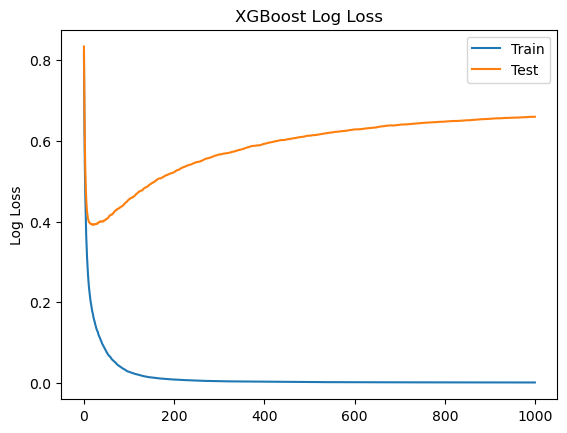

In [202]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
if 'validation_1' in results:
	ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [203]:
# plot classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       850
           1       0.53      0.24      0.33        37
           2       0.83      0.73      0.78       366

    accuracy                           0.86      1253
   macro avg       0.75      0.64      0.67      1253
weighted avg       0.86      0.86      0.86      1253



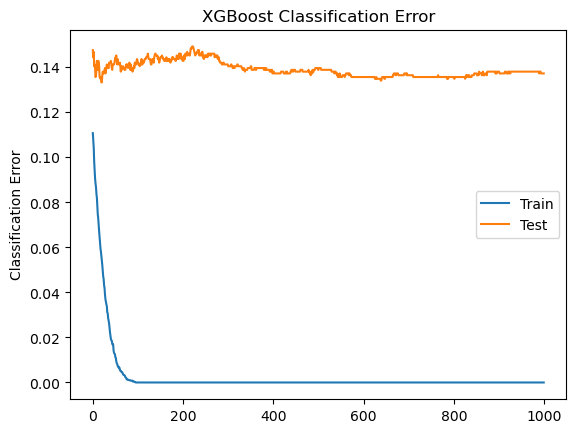

In [204]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
if 'validation_1' in results:
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()


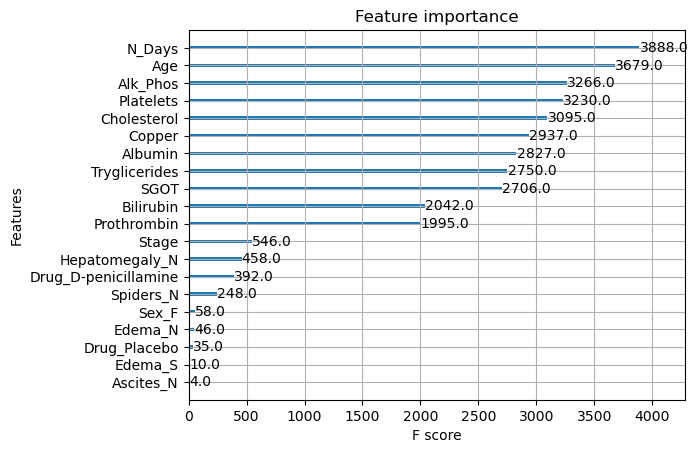

In [205]:

plot_importance(model) 
plt.show()

In [206]:
# import pickle
# pickle.dump(model, open("pima.pickle.dat", "wb")) 
# print("Saved model to: pima.pickle.dat")

# loaded_model = pickle.load(open("pima.pickle.dat", "rb")) 
# print("Loaded model from: pima.pickle.dat")